In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import euclidean_distances



In [7]:
def load_data():
    # Load data
    iris = load_iris()
    print(iris.DESCR)
    X = iris.data
    y = iris.target
    return X, y

In [2]:


def dbscan(data, eps, minPts):
    NOISE = -1
    UNASSIGNED = 0
    cluster_id = 1
    
    n_points = data.shape[0]
    labels = np.zeros(n_points, dtype=int)
    
    for p in range(n_points):
        if labels[p] != UNASSIGNED:
            continue
        
        neighbors = region_query(data, p, eps)
        
        if len(neighbors) < minPts:
            labels[p] = NOISE
            continue
        
        labels[p] = cluster_id
        
        seed_set = neighbors - {p}
        
        for q in seed_set:
            if labels[q] == NOISE:
                labels[q] = cluster_id
            
            if labels[q] != UNASSIGNED:
                continue
            
            labels[q] = cluster_id
            
            neighbors = region_query(data, q, eps)
            
            if len(neighbors) >= minPts:
                seed_set.update(neighbors)
        
        cluster_id += 1
    
    return labels

def region_query(data, point_id, eps):
    distances = euclidean_distances(data[point_id].reshape(1, -1), data)[0]
    neighbors = set(np.where(distances < eps)[0])
    return neighbors


In [10]:
# Carregar dados
iris = load_data()
X = iris[0][:, :2]

# Aplicar DBSCAN
labels = dbscan(X, eps=0.5, minPts=5)

# Plotar resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

RuntimeError: Set changed size during iteration

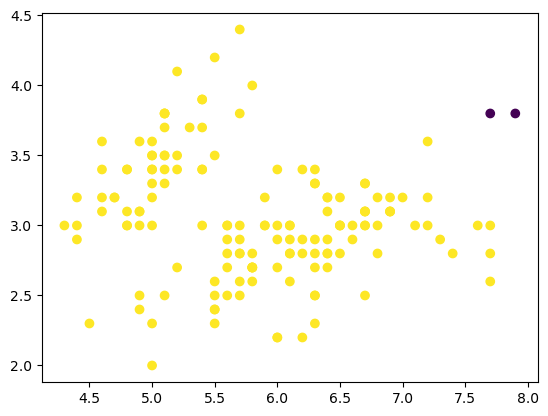

In [4]:
# Aplicar DBSCAN do scikit-learn
dbscan_sklearn = DBSCAN(eps=0.5, min_samples=5)
labels_sklearn = dbscan_sklearn.fit_predict(X)

# Plotar resultados
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn)
plt.show()
